# Try PCA on Airbnb bookings data
## Visualize PCA vectors

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_FOLDER = "/Users/sunandashanbhag/Desktop/Coding/Kaggle/Airbnb/airbnb-recruiting-new-user-bookings/"
WORK_FOLDER = "/Users/sunandashanbhag/Desktop/Coding/Kaggle/Airbnb/"

In [3]:
df = pd.read_csv("train_features.csv").drop('Unnamed: 0', axis=1)

In [4]:
# train_users = pd.read_csv(DATA_FOLDER+"train_users_2.csv")
# test_users = pd.read_csv(DATA_FOLDER+"test_users.csv")
# sessions = pd.read_csv(DATA_FOLDER+"sessions.csv")
# countries = pd.read_csv(DATA_FOLDER+"countries.csv")
# age_gender_bkts = pd.read_csv(DATA_FOLDER+"age_gender_bkts.csv")


In [5]:
df.head()

,id,pop,diff_firstbooking_datecreated,diff_firstbooking_firstactive,gender_feature,age,signup_method_basic,signup_method_facebook,signup_method_google,signup_app_Android,...,first_browser_wOSBrowser,language_levenshtein_distance,distance_km,action_distinct_count,device_distinct_count,sessions_count,min_secs,total_secs,avg_secs,country_destination
0,gxn3p5htnn,train,-1.0,-1.0,-1,-1.0,0,1,0,0,...,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NDF
1,820tgsjxq7,train,-1.0,-1.0,0,38.0,0,1,0,0,...,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NDF
2,4ft3gnwmtx,train,-57.0,419.0,1,56.0,1,0,0,0,...,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,US
3,bjjt8pjhuk,train,278.0,1043.0,1,42.0,0,1,0,0,...,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,other
4,87mebub9p4,train,-208.0,72.0,-1,41.0,1,0,0,0,...,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,US


In [6]:
features = df.columns[2:-1]

In [7]:
features

Index(['diff_firstbooking_datecreated', 'diff_firstbooking_firstactive',
       'gender_feature', 'age', 'signup_method_basic',
       'signup_method_facebook', 'signup_method_google', 'signup_app_Android',
       'signup_app_Moweb', 'signup_app_Web', 'signup_app_iOS',
       'first_device_type_Android Phone', 'first_device_type_Android Tablet',
       'first_device_type_Desktop (Other)', 'first_device_type_Mac Desktop',
       'first_device_type_Other/Unknown',
       'first_device_type_SmartPhone (Other)',
       'first_device_type_Windows Desktop', 'first_device_type_iPad',
       'first_device_type_iPhone', 'first_browser_-unknown-',
       'first_browser_AOL Explorer', 'first_browser_Android Browser',
       'first_browser_Apple Mail', 'first_browser_Arora',
       'first_browser_Avant Browser', 'first_browser_BlackBerry Browser',
       'first_browser_Camino', 'first_browser_Chrome',
       'first_browser_Chrome Mobile', 'first_browser_Chromium',
       'first_browser_CometBird',

In [8]:
X_train = df.loc[df['pop']=='train', features].astype(float).values
# X_test = all_features.loc[all_features['pop']=='test', features].values
y_train = df['country_destination'].values

In [9]:
from xgboost.sklearn import XGBClassifier
from sklearn.preprocessing import LabelEncoder

labler = LabelEncoder()
y_train = labler.fit_transform(y_train)


In [10]:
from sklearn.preprocessing import StandardScaler 
X_train_scaled = StandardScaler().fit_transform(X_train)

In [9]:
X_train

array([[-1.00000000e+00, -1.00000000e+00, -1.00000000e+00, ...,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+00],
       [-1.00000000e+00, -1.00000000e+00,  0.00000000e+00, ...,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+00],
       [-5.70000000e+01,  4.19000000e+02,  1.00000000e+00, ...,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+00],
       ...,
       [-1.00000000e+00, -1.00000000e+00, -1.00000000e+00, ...,
         3.90000000e+01,  3.53422000e+05,  1.96345556e+04],
       [-1.00000000e+00, -1.00000000e+00, -1.00000000e+00, ...,
         8.00000000e+00,  3.52049000e+05,  4.69398667e+03],
       [-1.00000000e+00, -1.00000000e+00, -1.00000000e+00, ...,
         8.00000000e+00,  2.76965000e+06,  6.75524390e+04]])

In [10]:
X_train_scaled

array([[-0.31108674, -0.31003037, -0.99700439, ..., -0.0253368 ,
        -0.39392243, -0.32194871],
       [-0.31108674, -0.31003037,  0.17636458, ..., -0.0253368 ,
        -0.39392243, -0.32194871],
       [-1.23308462,  6.53174856,  1.34973356, ..., -0.0253368 ,
        -0.39392243, -0.32194871],
       ...,
       [-0.31108674, -0.31003037, -0.99700439, ..., -0.02241572,
        -0.12990427,  0.27708492],
       [-0.31108674, -0.31003037, -0.99700439, ..., -0.02467955,
        -0.13092995, -0.17871594],
       [-0.31108674, -0.31003037, -0.99700439, ..., -0.02467955,
         1.67509447,  1.73894443]])

In [72]:
from sklearn.decomposition import PCA
pca = PCA(30)
x_new = pca.fit_transform(X_train_scaled)


In [73]:
pca

PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

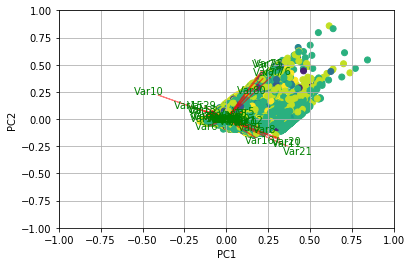

In [43]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y_train)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

In [74]:
# Explained variance per PC
pca.explained_variance_ratio_

array([0.05028569, 0.03999668, 0.03522606, 0.02938346, 0.02668255,
       0.02499335, 0.02444414, 0.02371382, 0.02009027, 0.01759627,
       0.01734556, 0.01661948, 0.01543325, 0.01327126, 0.01314079,
       0.01285544, 0.01283511, 0.01283318, 0.01282899, 0.01282362,
       0.01282292, 0.01282185, 0.01282131, 0.01282114, 0.01282104,
       0.01282093, 0.01282082, 0.01282071, 0.01282043, 0.01282006])

In [75]:
# Cumulative explained variance
np.cumsum(pca.explained_variance_ratio_)

array([0.05028569, 0.09028237, 0.12550843, 0.15489189, 0.18157445,
       0.2065678 , 0.23101194, 0.25472575, 0.27481602, 0.2924123 ,
       0.30975785, 0.32637733, 0.34181058, 0.35508185, 0.36822263,
       0.38107808, 0.39391318, 0.40674636, 0.41957535, 0.43239897,
       0.44522189, 0.45804375, 0.47086506, 0.4836862 , 0.49650723,
       0.50932816, 0.52214899, 0.5349697 , 0.54779013, 0.56061019])

In [76]:
print ('Explained variance by component: %s' % pca.explained_variance_ratio_)
display (pd.DataFrame(pca.components_,columns=features))

Explained variance by component: [0.05028569 0.03999668 0.03522606 0.02938346 0.02668255 0.02499335
 0.02444414 0.02371382 0.02009027 0.01759627 0.01734556 0.01661948
 0.01543325 0.01327126 0.01314079 0.01285544 0.01283511 0.01283318
 0.01282899 0.01282362 0.01282292 0.01282185 0.01282131 0.01282114
 0.01282104 0.01282093 0.01282082 0.01282071 0.01282043 0.01282006]


,diff_firstbooking_datecreated,diff_firstbooking_firstactive,gender_feature,age,signup_method_basic,signup_method_facebook,signup_method_google,signup_app_Android,signup_app_Moweb,signup_app_Web,...,first_browser_Yandex.Browser,first_browser_wOSBrowser,language_levenshtein_distance,distance_km,action_distinct_count,device_distinct_count,sessions_count,min_secs,total_secs,avg_secs
0,-0.043610,-0.043798,-0.128870,-0.128807,0.090319,-0.100530,0.088671,0.197178,0.122083,-0.404166,...,-0.000622,-0.000381,-0.0,-0.0,0.223891,0.263162,0.217904,0.035554,0.210137,0.130726
1,0.006377,0.005728,0.005684,0.034910,0.062122,-0.060487,-0.016066,-0.078449,-0.065410,0.219847,...,0.003800,-0.000703,-0.0,-0.0,0.446262,0.384806,0.372422,0.044372,0.439438,0.230859
2,0.207782,0.207651,0.402867,0.383171,-0.483208,0.481614,0.026010,0.027487,0.015181,-0.106177,...,0.000999,-0.001471,-0.0,-0.0,0.067964,0.067592,0.081445,-0.002872,0.071104,0.010294
3,-0.023762,-0.024006,0.112056,0.116637,-0.169793,0.170033,0.002026,-0.007738,0.004846,0.007148,...,0.007992,0.001752,-0.0,-0.0,0.013802,0.024844,0.001170,0.011836,0.015776,0.030021
4,-0.108486,-0.108698,-0.013614,-0.013143,-0.069432,0.047664,0.195434,0.333883,-0.067691,-0.028584,...,0.002225,0.004929,-0.0,-0.0,0.021955,-0.012767,0.049456,-0.036813,0.014486,-0.056146
5,-0.596951,-0.596979,0.066406,0.030123,-0.203940,0.199039,0.048609,0.041707,0.064157,0.040578,...,0.001078,0.004914,-0.0,-0.0,0.002422,0.005230,0.005818,-0.010439,0.007853,-0.004053
6,0.159021,0.159053,-0.005134,-0.003010,0.050582,-0.052660,0.017256,0.019617,0.046056,-0.011476,...,0.002307,-0.008114,0.0,0.0,-0.006397,-0.002714,-0.005208,0.002617,-0.005374,-0.002442
7,0.217570,0.217642,-0.008643,-0.007846,0.029077,-0.054089,0.221894,0.280822,0.154897,0.050636,...,-0.002649,0.007006,-0.0,-0.0,-0.029405,-0.028071,-0.005255,-0.039926,-0.022808,-0.048512
8,-0.037512,-0.037328,-0.003266,-0.036895,0.008884,0.004408,-0.118508,-0.317167,0.329623,-0.128880,...,0.004938,0.019724,-0.0,-0.0,-0.051199,0.023392,-0.103651,0.131343,-0.065521,0.136453
9,0.010577,0.010532,0.047614,0.064697,-0.019304,0.016865,0.022180,0.060534,-0.059334,0.021335,...,-0.010526,0.015515,-0.0,-0.0,-0.047624,0.009497,-0.097446,0.413540,-0.033824,0.346365


In [77]:
df_dot = pd.DataFrame(X_train.T.dot(x_new))
df_dot_norm = (df_dot - df_dot.mean())/df_dot.std() 

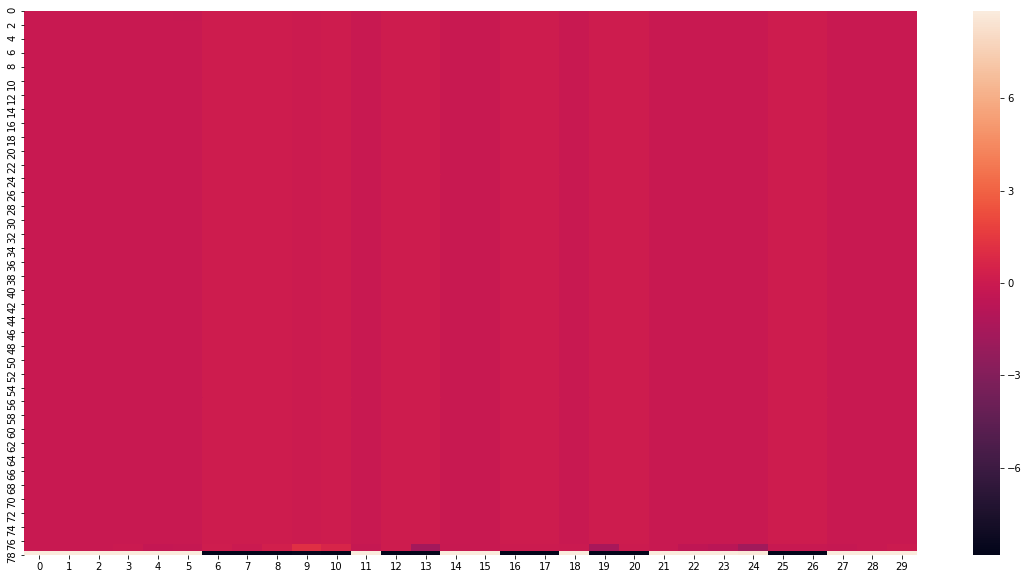

In [78]:
plt.figure(figsize=(20,10))
import seaborn as sns
sns.heatmap(df_dot_norm)

In [9]:
import numpy as np
mean_vec = np.mean(X_train_scaled, axis=0)


In [10]:
len(mean_vec)

80

In [11]:
cov_mat = (X_train_scaled - mean_vec).T.dot((X_train_scaled - mean_vec)) / (X_train_scaled.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)


Covariance matrix 
[[ 1.00000468  0.98987306  0.12678177 ... -0.00193767 -0.00771084
  -0.01124265]
 [ 0.98987306  1.00000468  0.12688578 ... -0.00197383 -0.00851039
  -0.01184381]
 [ 0.12678177  0.12688578  1.00000468 ... -0.01123301 -0.00595691
  -0.04499729]
 ...
 [-0.00193767 -0.00197383 -0.01123301 ...  1.00000468  0.00715953
   0.45593784]
 [-0.00771084 -0.00851039 -0.00595691 ...  0.00715953  1.00000468
   0.33332576]
 [-0.01124265 -0.01184381 -0.04499729 ...  0.45593784  0.33332576
   1.00000468]]


In [11]:
cov_mat1 = np.cov(X_train_scaled.T)

In [12]:
cov_mat1

array([[ 1.00000468,  0.98987306,  0.12678177, ..., -0.00193767,
        -0.00771084, -0.01124265],
       [ 0.98987306,  1.00000468,  0.12688578, ..., -0.00197383,
        -0.00851039, -0.01184381],
       [ 0.12678177,  0.12688578,  1.00000468, ..., -0.01123301,
        -0.00595691, -0.04499729],
       ...,
       [-0.00193767, -0.00197383, -0.01123301, ...,  1.00000468,
         0.00715953,  0.45593784],
       [-0.00771084, -0.00851039, -0.00595691, ...,  0.00715953,
         1.00000468,  0.33332576],
       [-0.01124265, -0.01184381, -0.04499729, ...,  0.45593784,
         0.33332576,  1.00000468]])

In [13]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat1)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 4.36059870e-02  6.38166482e-03  2.07567747e-01 ... -1.42537120e-13
   0.00000000e+00  0.00000000e+00]
 [ 4.37931700e-02  5.73364852e-03  2.07436040e-01 ... -1.21980645e-13
   0.00000000e+00  0.00000000e+00]
 [ 1.28896519e-01  5.70188125e-03  4.03557209e-01 ... -3.99686542e-13
   0.00000000e+00  0.00000000e+00]
 ...
 [-3.54879703e-02  4.45080658e-02 -3.17576326e-03 ...  9.42174780e-14
   0.00000000e+00  0.00000000e+00]
 [-2.10139277e-01  4.39498390e-01  7.13007984e-02 ...  4.48159735e-13
   0.00000000e+00  0.00000000e+00]
 [-1.30705667e-01  2.30913072e-01  9.84089666e-03 ... -3.09834291e-13
   0.00000000e+00  0.00000000e+00]]

Eigenvalues 
[ 3.92230942e+00  3.11981578e+00  2.74778980e+00  2.29220163e+00
  2.08173074e+00  1.95028461e+00  1.90967035e+00  1.85203088e+00
  1.57334551e+00  1.38087110e+00  1.37577184e+00  1.31172146e+00
  1.01258318e-02  1.71178798e-01  2.01743582e-01  1.02652965e-01
  9.15453851e-02  3.13274431e-01  3.14667656e-03  4.41839916e-01
  4.0206781

In [14]:
for ev in eig_vecs.T:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In [15]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
3.922309416663767
3.1198157806490894
2.7477898001473497
2.292201627345301
2.0817307418229904
1.9502846115293975
1.9096703468812097
1.852030875698312
1.5733455079722443
1.3808710985336847
1.375771838317063
1.3117214589599087
1.225585408722743
1.0454639468197953
1.0370409981993478
1.0054278108156995
1.0033289097917866
1.0026697996864191
1.0020523454564827
1.0007212338412457
1.0005109930429257
1.0004298234216913
1.0002868935953004
1.0002079670741277
1.0001709796204783
1.000140754772014
1.000125963412341
1.0001142022620992
1.0000836948389678
1.0000775291433794
1.0000675534845638
1.0000592457383728
1.000056517110047
1.0000509902932115
1.0000411132906766
1.0000402040469234
1.0000343742387192
1.0000253878226353
1.0000230522718498
1.0000168520240689
1.0000159762390979
1.0000143864433846
1.0000141405186473
1.0000138039119588
1.0000117551485226
1.0000113232050805
1.0000104379920196
1.0000101773721122
1.0000093733533177
1.0000093698977828
1.0000093698977741
1.0000

In [16]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

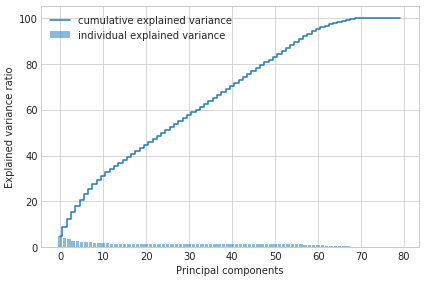

In [18]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(80), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(80), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()


In [ ]:
# k-fold cross validation evaluation of xgboost model
from numpy import loadtxt
import xgboost
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

model = xgboost.XGBClassifier()
kfold = StratifiedKFold(n_splits=10, random_state=7)
results = cross_val_score(model, X, Y, cv=kfold)


In [ ]:
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [325]:
y_train

array([ 7,  7, 10, ...,  7,  7,  7])

In [327]:
xgb = XGBClassifier(max_depth=6, learning_rate=0.3, n_estimators=22,
                    objective='multi:softprob', subsample=0.6, colsample_bytree=0.6, seed=0)               
xgb.fit(X_train, y_train)
y_pred = xgb.predict_proba(X_test) 

In [ ]:
ids = []  #list of ids
cts = []  #list of countries
for i in range(len(X_test)):
    idx = test_ids[i]
    ids += [idx] * 5
    cts += labler.inverse_transform(np.argsort(y_pred[i])[::-1])[:5].tolist()
